# Markov Chain Monte Carlo

## Markov Chain Monte Carlo (MCMC): Sampling the Impossible

## 1. The Core Problem MCMC Solves

In Bayesian inference, we often want the posterior distribution:

\[
p(\theta \mid x) = \frac{p(x \mid \theta)\, p(\theta)}{p(x)}
\]

The problem is the denominator:

\[
p(x) = \int p(x \mid \theta)\, p(\theta)\, d\theta
\]

For anything non-trivial, this integral is:

- High-dimensional  
- Intractable  
- Impossible to compute analytically  

**MCMC exists because exact Bayesian inference usually cannot be done.**

---

## 2. What Is Markov Chain Monte Carlo?

**Markov Chain Monte Carlo (MCMC)** is a family of algorithms that:

> Generate samples from a target probability distribution by constructing a Markov chain whose stationary distribution is that target distribution.

### Key idea

- You don’t compute the distribution  
- You sample from it  
- Expectations become sample averages  

Formally, if:

\[
\theta^{(1)}, \ldots, \theta^{(N)} \sim p(\theta \mid x)
\]

Then expectations can be approximated as:

\[
\mathbb{E}[f(\theta)] \approx \frac{1}{N} \sum_{i=1}^{N} f(\theta^{(i)})
\]

---

## 3. Why “Markov Chain”?

A Markov chain satisfies:

\[
p(\theta^{(t+1)} \mid \theta^{(t)}, \ldots, \theta^{(1)})
=
p(\theta^{(t+1)} \mid \theta^{(t)})
\]

Meaning:

- The next sample depends only on the current one  
- Transitions are **memoryless**  

This constraint makes sampling feasible—but introduces **correlation** between samples.

---

## 4. Why “Monte Carlo”?

“Monte Carlo” refers to:

- Using randomness to approximate expectations  
- Replacing integrals with averages  

**MCMC = Monte Carlo integration using dependent samples generated by a Markov chain**

---

## 5. The General MCMC Workflow

Every MCMC method follows this structure:

1. Define target density \( p(\theta) \) (up to a constant)  
2. Initialize \( \theta^{(0)} \)  
3. Propose a new state \( \theta' \)  
4. Decide whether to accept it  
5. Repeat until convergence  

The key trick is step 4:  
**accept/reject without knowing the normalizing constant**.

---

## 6. Metropolis–Hastings: The Canonical Algorithm

### Step 1: Proposal Distribution

Propose a new state:

\[
\theta' \sim q(\theta' \mid \theta^{(t)})
\]

Common choice:  
- Gaussian random walk

---

### Step 2: Acceptance Probability

Compute:

\[
\alpha = \min\left(
1,
\frac{p(\theta')\, q(\theta^{(t)} \mid \theta')}
     {p(\theta^{(t)})\, q(\theta' \mid \theta^{(t)})}
\right)
\]

**Key insight:**

- The normalizing constant cancels out  
- Only the **unnormalized density** is required  

---

### Step 3: Accept or Reject

\[
\theta^{(t+1)} =
\begin{cases}
\theta', & \text{with probability } \alpha \\
\theta^{(t)}, & \text{otherwise}
\end{cases}
\]

Rejected proposals cause repeated samples, increasing **autocorrelation**.

---

## 7. Why This Works (Stationarity Intuition)

Metropolis–Hastings enforces **detailed balance**:

\[
p(\theta)\, T(\theta \to \theta') =
p(\theta')\, T(\theta' \to \theta)
\]

This guarantees:

- The target distribution is **stationary**  
- Long-run samples come from the correct posterior  

⚠️ Stationarity does **not** imply fast convergence.

---

## 8. Burn-in, Mixing, and Autocorrelation

### Burn-in

Early samples depend heavily on initialization.

Solution:

- Discard the first \( N_{\text{burn}} \) samples

---

### Mixing

Mixing measures how fast the chain explores the distribution.

Poor mixing leads to:

- Strong autocorrelation  
- Inefficient sampling  

---

### Effective Sample Size (ESS)

\[
\text{ESS} < N
\]

Even 100,000 samples may correspond to only a few thousand independent ones.

---

## 9. Hamiltonian Monte Carlo (Why Modern MCMC Exists)

Random-walk MCMC scales poorly in high dimensions.

**Hamiltonian Monte Carlo (HMC)** improves this by:

- Using gradients of \( \log p(\theta) \)  
- Introducing auxiliary momentum variables  
- Following physics-inspired trajectories  

Effects:

- Longer proposals  
- Lower autocorrelation  
- Better scaling with dimension  

Trade-offs:

- Requires differentiable log-density  
- More complex to implement  

This is why tools like **Stan** and **PyMC** use **HMC / NUTS** by default.

---

## 10. What MCMC Gives You (and What It Doesn’t)

### What You Get

- ✔ Samples from the posterior  
- ✔ Uncertainty quantification  
- ✔ Parameter correlations  
- ✔ Bayesian credible intervals  

### What You Don’t Get

- ✖ Exact distributions  
- ✖ Guaranteed fast convergence  
- ✖ Scalability to massive datasets  

**MCMC trades exactness for generality.**

---

## 11. When Should You Use MCMC?

### Use MCMC when:

- Posterior is complex  
- Uncertainty matters  
- Dataset is moderate-sized  
- Model is hierarchical or fully Bayesian  

### Avoid MCMC when:

- Dataset is huge  
- Posterior has a closed form  
- Latency constraints exist  

---


## Metropolis–Hastings Algorithm: Step-by-Step Walkthrough with Equations

## 1. Problem Setup

We want to sample from a **target distribution**:

$$
\pi(\theta)
$$

where:
- $\theta \in \mathbb{R}^d$
- $\pi(\theta)$ is known **up to a normalization constant**

Typically:

$$
\pi(\theta) = p(\theta \mid x) \propto p(x \mid \theta)\, p(\theta)
$$

The normalization constant:

$$
Z = \int p(x \mid \theta)\, p(\theta)\, d\theta
$$

is **intractable**, so direct sampling is impossible.

---

## 2. Key Idea of Metropolis–Hastings

Construct a **Markov chain**:

$$
\theta^{(0)}, \theta^{(1)}, \theta^{(2)}, \dots
$$

such that:

$$
\theta^{(t)} \xrightarrow{d} \pi(\theta)
\quad \text{as } t \to \infty
$$

Then expectations can be approximated by:

$$
\mathbb{E}_\pi[f(\theta)]
\approx
\frac{1}{N} \sum_{t=1}^N f(\theta^{(t)})
$$

---

## 3. Markov Property Assumption

The chain satisfies the **Markov property**:

$$
p(\theta^{(t+1)} \mid \theta^{(t)}, \dots, \theta^{(0)})
=
p(\theta^{(t+1)} \mid \theta^{(t)})
$$

Only the current state matters.

---

## 4. Step 1 — Choose a Proposal Distribution

Define a proposal density:

$$
q(\theta' \mid \theta)
$$

which proposes a new candidate state $\theta'$ given the current state $\theta$.

Common choice (random walk):

$$
\theta' = \theta + \varepsilon,
\quad
\varepsilon \sim \mathcal{N}(0, \Sigma)
$$

Important:
- $q(\cdot)$ does **not** need to resemble $\pi(\cdot)$
- But poor choices lead to slow mixing

---

## 5. Step 2 — Compute the Acceptance Ratio

Given current state $\theta^{(t)}$ and proposal $\theta'$,
compute the **acceptance ratio**:

$$
r
=
\frac{
\pi(\theta')\, q(\theta^{(t)} \mid \theta')
}{
\pi(\theta^{(t)})\, q(\theta' \mid \theta^{(t)})
}
$$

Key insight:
- The normalization constant cancels out
- Only unnormalized $\pi(\theta)$ is required

---

## 6. Step 3 — Acceptance Probability

Define the acceptance probability:

$$
\alpha = \min(1, r)
$$

This guarantees:
- $\alpha \in [0,1]$
- Detailed balance is satisfied

---

## 7. Step 4 — Accept or Reject the Proposal

Sample:

$$
u \sim \text{Uniform}(0, 1)
$$

Then:

$$
\theta^{(t+1)} =
\begin{cases}
\theta', & \text{if } u \le \alpha \\
\theta^{(t)}, & \text{otherwise}
\end{cases}
$$

Rejected proposals cause **repeated samples**, increasing autocorrelation.

---

## 8. Special Case — Symmetric Proposals

If the proposal is symmetric:

$$
q(\theta' \mid \theta) = q(\theta \mid \theta')
$$

then the ratio simplifies to:

$$
r = \frac{\pi(\theta')}{\pi(\theta^{(t)})}
$$

This is the **Metropolis algorithm**.

---

## 9. Why This Works (Detailed Balance)

Metropolis–Hastings enforces **detailed balance**:

$$
\pi(\theta)\, T(\theta \to \theta')
=
\pi(\theta')\, T(\theta' \to \theta)
$$

where $T(\cdot)$ is the transition kernel.

This implies:
- $\pi(\theta)$ is a stationary distribution
- Long-run samples follow the correct target distribution

---

## 10. Burn-in Period

Early samples depend strongly on the initial state $\theta^{(0)}$.

Solution:
- Discard the first $B$ samples

$$
\{\theta^{(B+1)}, \dots, \theta^{(N)}\}
$$

This is called **burn-in**.

---

## 11. Autocorrelation and Mixing

Because samples are dependent:

$$
\text{Cov}(\theta^{(t)}, \theta^{(t+k)}) \neq 0
$$

Consequences:
- Slow exploration if proposal steps are too small
- Low acceptance rate if steps are too large

Effective Sample Size (ESS):

$$
\text{ESS} \ll N
$$

---

## 12. Algorithm Summary (Pseudo-Code)

1. Initialize $\theta^{(0)}$
2. For $t = 0, \dots, T-1$:
   - Sample $\theta' \sim q(\theta' \mid \theta^{(t)})$
   - Compute $r$
   - Set $\alpha = \min(1, r)$
   - Accept or reject $\theta'$
3. Discard burn-in samples
4. Use remaining samples for inference

---

## 13. Mental Model

Metropolis–Hastings does **not** try to move uphill only.

Instead:
- It prefers high-density regions
- Occasionally accepts worse moves
- This allows exploration of the full distribution

---

## 14. Key Failure Modes (Important)

- Proposal variance too small → slow mixing
- Proposal variance too large → low acceptance
- High-dimensional random walks → exponential slowdown

This is why modern Bayesian tools prefer **Hamiltonian Monte Carlo**.

---

## 15. One-Sentence Summary

> Metropolis–Hastings turns an intractable probability distribution into a tractable sequence of correlated samples whose long-run behavior matches the target distribution.


## Metropolis–Hastings Algorithm From Scratch

### 1. Problem Setup (Concrete Target Distribution)

We will sample from a 1D Bayesian posterior:

π(θ)∝exp(−1./2θ2)	​

This is a standard normal distribution — chosen only so we can verify correctness.
MCMC does not rely on knowing the normalization constant.

### 2. Define the Log Target Density

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def log_target(theta):
    """
    Unnormalized log target density.
    Here: standard normal N(0, 1)
    """
    return -0.5 * theta**2

### 3. Metropolis–Hastings Sampler (Core Algorithm)

In [2]:
def metropolis_hastings(
    log_target,
    initial_theta,
    n_samples,
    proposal_std
):
    samples = np.zeros(n_samples)
    theta = initial_theta

    accept_count = 0

    for t in range(n_samples):
        # Step 1: propose new state
        theta_proposed = theta + np.random.normal(0, proposal_std)

        # Step 2: compute log acceptance ratio
        log_r = (
            log_target(theta_proposed)
            - log_target(theta)
        )

        # Step 3: accept / reject
        if np.log(np.random.rand()) < log_r:
            theta = theta_proposed
            accept_count += 1

        samples[t] = theta

    acceptance_rate = accept_count / n_samples
    return samples, acceptance_rate


Why this is correct

- Proposal is symmetric → proposal terms cancel
- Uses log_r → avoids underflow
- Rejected proposals repeat the current state (as required)

### Run the Sampler

In [3]:
np.random.seed(42)

samples, acc_rate = metropolis_hastings(
    log_target=log_target,
    initial_theta=5.0,     # deliberately far from the mode
    n_samples=50_000,
    proposal_std=1.0
)

print(f"Acceptance rate: {acc_rate:.3f}")

Acceptance rate: 0.706


### Burn-in and Thinning (Optional but Honest)

In [4]:
burn_in = 5_000
posterior_samples = samples[burn_in:]

### Diagnostics: Trace Plot

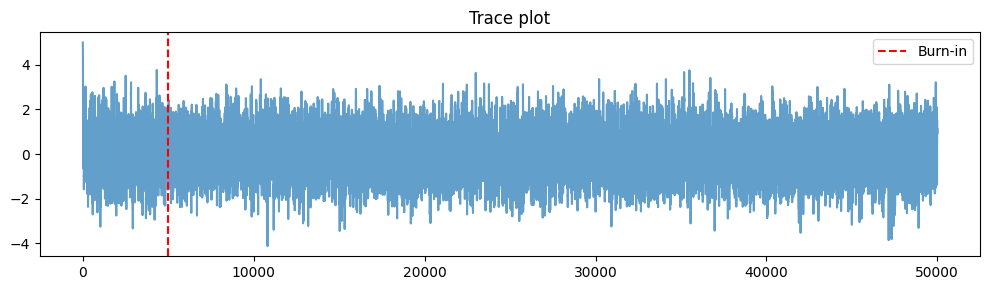

In [5]:
plt.figure(figsize=(10, 3))
plt.plot(samples, alpha=0.7)
plt.axvline(burn_in, color="red", linestyle="--", label="Burn-in")
plt.title("Trace plot")
plt.legend()
plt.tight_layout()
plt.show()

### Posterior Histogram vs True Density

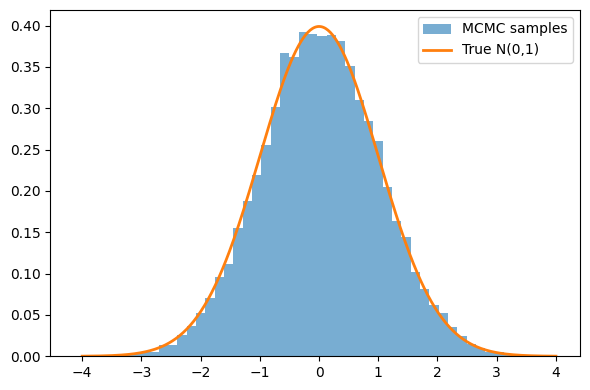

In [6]:
x = np.linspace(-4, 4, 400)
true_density = np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

plt.figure(figsize=(6, 4))
plt.hist(
    posterior_samples,
    bins=50,
    density=True,
    alpha=0.6,
    label="MCMC samples"
)
plt.plot(x, true_density, label="True N(0,1)", linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()

### Acceptance Rate Sensitivity (Critical Insight)

In [7]:
for std in [0.1, 0.5, 1.0, 3.0]:
    _, rate = metropolis_hastings(
        log_target, 0.0, 10_000, std
    )
    print(f"proposal_std={std:<4} | acceptance={rate:.3f}")

proposal_std=0.1  | acceptance=0.972
proposal_std=0.5  | acceptance=0.846
proposal_std=1.0  | acceptance=0.710
proposal_std=3.0  | acceptance=0.370


What you should observe:

- Too small → high acceptance, slow mixing
- Too large → low acceptance, stuck chain
- Middle ground → efficient exploration

### Why This Breaks in High Dimensions (Important)

This sampler:

- Uses random-walk proposals
- Scales exponentially badly with dimension

That is exactly why Hamiltonian Monte Carlo exists.

If you increase dimension without changing the proposal:

- Acceptance rate collapses
- Autocorrelation explodes

##

## Hamiltonian Monte Carlo (HMC): Step-by-Step Walkthrough with Equations

## 1. Why Metropolis–Hastings Breaks Down

In high dimensions, random-walk Metropolis suffers from:
- Strong autocorrelation
- Vanishing acceptance rates
- Exponentially slow exploration

HMC fixes this by using **gradient information** to move through parameter space efficiently.

---

## 2. Core Idea of Hamiltonian Monte Carlo

HMC introduces auxiliary **momentum variables** and simulates **Hamiltonian dynamics** to propose distant, high-probability states.

Instead of random walking:
> Follow smooth trajectories guided by geometry of the target distribution.

---

## 3. Target Distribution

We want to sample from:

$$
\pi(\theta) \propto \exp\left(-U(\theta)\right)
$$

where:
- $\theta \in \mathbb{R}^d$
- $U(\theta)$ is the **potential energy**

Typically:

$$
U(\theta) = -\log p(\theta \mid x)
$$

(up to a constant).

---

## 4. Augment the State Space with Momentum

Introduce momentum variables:

$$
r \sim \mathcal{N}(0, M)
$$

where:
- $r \in \mathbb{R}^d$
- $M$ is the **mass matrix** (positive definite)

Define kinetic energy:

$$
K(r) = \frac{1}{2} r^\top M^{-1} r
$$

---

## 5. Define the Hamiltonian

The **Hamiltonian** is total energy:

$$
H(\theta, r) = U(\theta) + K(r)
$$

The joint distribution becomes:

$$
p(\theta, r) \propto \exp\left(-H(\theta, r)\right)
$$

Marginalizing out $r$ recovers $\pi(\theta)$.

---

## 6. Hamilton’s Equations of Motion

Hamiltonian dynamics evolve according to:

$$
\frac{d\theta}{dt} = \frac{\partial H}{\partial r} = M^{-1} r
$$

$$
\frac{dr}{dt} = -\frac{\partial H}{\partial \theta} = -\nabla U(\theta)
$$

Properties:
- Volume-preserving
- Reversible
- Energy-conserving (in continuous time)

---

## 7. Numerical Integration: Leapfrog Method

Exact dynamics are unavailable, so we use **leapfrog integration**.

For step size $\varepsilon$:

1. Half-step momentum update:
$$
r\left(t + \frac{\varepsilon}{2}\right)
=
r(t) - \frac{\varepsilon}{2} \nabla U(\theta(t))
$$

2. Full-step position update:
$$
\theta(t + \varepsilon)
=
\theta(t) + \varepsilon M^{-1} r\left(t + \frac{\varepsilon}{2}\right)
$$

3. Half-step momentum update:
$$
r(t + \varepsilon)
=
r\left(t + \frac{\varepsilon}{2}\right)
- \frac{\varepsilon}{2} \nabla U(\theta(t + \varepsilon))
$$

Repeat for $L$ steps.

---

## 8. Metropolis Correction Step

Because leapfrog integration is approximate, energy is not perfectly conserved.

Accept proposed state $(\theta', r')$ with probability:

$$
\alpha
=
\min\left(
1,
\exp\left(
- H(\theta', r') + H(\theta, r)
\right)
\right)
$$

If rejected, retain $(\theta, r)$.

This restores **exactness**.

---

## 9. Full HMC Algorithm

1. Initialize $\theta^{(0)}$
2. For iteration $t = 0, \dots, T-1$:
   - Sample momentum $r^{(t)} \sim \mathcal{N}(0, M)$
   - Simulate Hamiltonian dynamics for $L$ leapfrog steps
   - Obtain proposal $(\theta', r')$
   - Accept or reject using Metropolis rule
3. Discard burn-in samples
4. Use remaining $\theta$ samples for inference

---

## 10. Why HMC Works Better

Compared to random-walk Metropolis:

| Property | Random Walk MH | HMC |
|--------|---------------|-----|
| Uses gradients | ❌ | ✅ |
| Step size | Small | Large |
| Autocorrelation | High | Low |
| Scaling in $d$ | Poor | Much better |

HMC proposals move **along level sets** of the posterior.

---

## 11. Choice of Hyperparameters

Critical parameters:
- Step size $\varepsilon$
- Number of steps $L$
- Mass matrix $M$

Trade-offs:
- Large $\varepsilon$ → low acceptance
- Small $\varepsilon$ → slow exploration
- Poor $M$ → inefficient trajectories

Tuning is hard — this motivates **NUTS**.

---

## 12. No-U-Turn Sampler (NUTS)

NUTS automatically:
- Chooses $L$
- Prevents trajectories from doubling back
- Adapts step size during warm-up

Modern probabilistic frameworks (Stan, PyMC) use NUTS by default.

---

## 13. Common Failure Modes

- Non-differentiable posteriors
- Poorly scaled parameters
- Strong correlations not captured by $M$
- Discontinuous likelihoods

Reparameterization often fixes these.

---

## 14. Mental Model

Random-walk MCMC:
> Blind steps + rejection

Hamiltonian Monte Carlo:
> Physics-guided exploration with rare corrections

HMC turns sampling into **controlled motion**, not guesswork.

---

## 15. One-Sentence Summary

> Hamiltonian Monte Carlo samples efficiently in high dimensions by simulating energy-conserving dynamics guided by gradients of the log-posterior.


## Hamiltonian Monte Carlo (HMC) — NumPy From Scratch

### Define the Potential Energy and Its Gradient

In HMC we work with:

U(θ)=−logπ(θ)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def U(theta):
    """Potential energy"""
    return 0.5 * theta**2

def grad_U(theta):
    """Gradient of potential energy"""
    return theta


Why this matters:

- HMC requires gradients
- If you cannot compute grad_U, HMC is not applicable

### Leapfrog Integrator (Core of HMC)

In [8]:
def leapfrog(theta, r, step_size, n_steps):
    """
    Leapfrog integration of Hamiltonian dynamics
    """
    theta_new = theta
    r_new = r

    # Half step for momentum
    r_new -= 0.5 * step_size * grad_U(theta_new)

    for _ in range(n_steps):
        # Full step for position
        theta_new += step_size * r_new

        # Full step for momentum (except last iteration)
        if _ != n_steps - 1:
            r_new -= step_size * grad_U(theta_new)

    # Final half step for momentum
    r_new -= 0.5 * step_size * grad_U(theta_new)

    # Negate momentum for reversibility
    return theta_new, -r_new

Why leapfrog?

- Volume preserving
- Time reversible
- Keeps energy approximately constant

### Hamiltonian Function

In [9]:
def hamiltonian(theta, r):
    return U(theta) + 0.5 * r**2

### HMC Sampler (Main Algorithm)

In [10]:
def hmc_sampler(
    initial_theta,
    n_samples,
    step_size,
    n_steps
):
    samples = np.zeros(n_samples)
    theta = initial_theta
    accept_count = 0

    for t in range(n_samples):
        # Step 1: sample momentum
        r = np.random.normal(0, 1)

        # Step 2: simulate Hamiltonian dynamics
        theta_proposed, r_proposed = leapfrog(
            theta, r, step_size, n_steps
        )

        # Step 3: Metropolis acceptance step
        current_H = hamiltonian(theta, r)
        proposed_H = hamiltonian(theta_proposed, r_proposed)

        log_accept_prob = current_H - proposed_H

        if np.log(np.random.rand()) < log_accept_prob:
            theta = theta_proposed
            accept_count += 1

        samples[t] = theta

    acceptance_rate = accept_count / n_samples
    return samples, acceptance_rate


Key points:

- Momentum is resampled every iteration
- Acceptance step corrects numerical error
- Without this step, HMC would be biased

In [14]:
np.random.seed(42)

samples, acc_rate = hmc_sampler(
    initial_theta=5.0,   # far from mode on purpose
    n_samples=20_000,
    step_size=0.1,
    n_steps=20
)

print(f"Acceptance rate: {acc_rate:.3f}")


Acceptance rate: 0.999


### Trace Plot (Mixing Diagnostic)

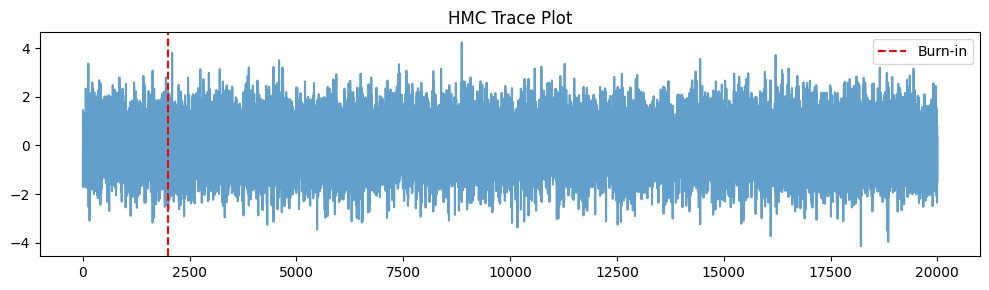

In [15]:
burn_in = 2_000
posterior_samples = samples[burn_in:]

plt.figure(figsize=(10, 3))
plt.plot(samples, alpha=0.7)
plt.axvline(burn_in, color="red", linestyle="--", label="Burn-in")
plt.title("HMC Trace Plot")
plt.legend()
plt.tight_layout()
plt.show()


What you should see:

- Fast convergence
- Low autocorrelation
- No random-walk behavior

### Posterior Histogram vs True Density

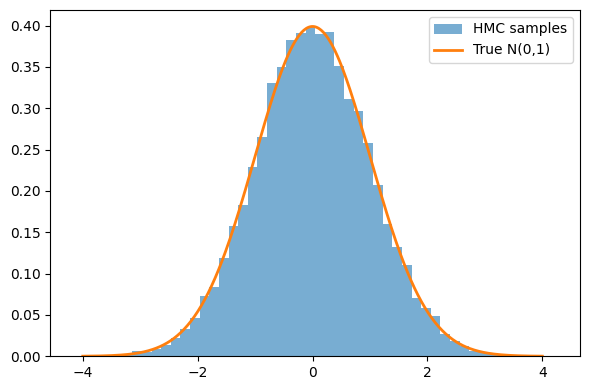

In [16]:
x = np.linspace(-4, 4, 400)
true_density = np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

plt.figure(figsize=(6, 4))
plt.hist(
    posterior_samples,
    bins=50,
    density=True,
    alpha=0.6,
    label="HMC samples"
)
plt.plot(x, true_density, linewidth=2, label="True N(0,1)")
plt.legend()
plt.tight_layout()
plt.show()

### Why This Beats Metropolis–Hastings

| Property         | Random-Walk MH | HMC            |
| ---------------- | -------------- | -------------- |
| Proposal         | Random         | Physics-guided |
| Autocorrelation  | High           | Low            |
| Step size        | Small          | Large          |
| High-dim scaling | Terrible       | Good           |
| Uses gradients   | ❌              | ✅              |

HMC moves along probability contours, not across them.

## Failure Modes (Very Important)

HMC fails when:

- Target is non-differentiable
- Gradients are noisy or wrong
- Step size too large → rejection
- Step size too small → inefficiency

Most real issues are parameterization problems, not HMC itself.

### Mental Model

Random-walk MH:

- Guess → reject → repeat

Hamiltonian Monte Carlo:

- Launch → coast → gently correct

That difference is why modern Bayesian frameworks default to HMC / NUTS.